In [1]:
import pandas as pd
import pdb
import numpy as np
import itertools
from utils import *
from snakemake.io import expand
import yaml
import cerberus
import pyranges as pr
import upsetplot
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from matplotlib_venn import venn3

In [2]:
config_file = 'workflow/config.yml'
with open(config_file) as f:
    config = yaml.safe_load(f)

In [5]:
pls_file = expand(config['ccre']['intersect'],
                       species='human',
                  ccre_type=['pls'])[0]

In [9]:
df = pr.read_bed(pls_file).df
df.rename({'ThickStart':'source'}, axis=1, inplace=True)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

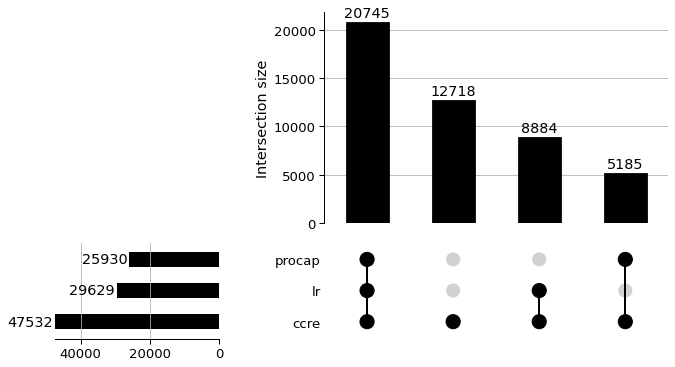

In [10]:
# get melted version of regions
end_upset = upsetplot.from_memberships(df.source.str.split(','), data=df)

# make the plot
fig = plt.figure(figsize=(11,6))
sns.set_context('paper', font_scale=1.5)
upsetplot.plot(end_upset, subset_size='auto',
                show_counts='%d', sort_by='cardinality',
                fig=fig, shading_color='white', element_size=None)

# fname = '{}_{}_source_upset.png'.format(opref, mode)
# plt.savefig(fname, dpi=300, bbox_inches='tight')